# Lecture 25 Neural Networks Models

read materials
- https://scikit-learn.org/stable/modules/neural_networks_supervised.html

## Multi-layer Perceptron

See the figure in https://scikit-learn.org/stable/modules/neural_networks_supervised.html

$$ h_1 = \sigma (W_1 X + b_1)$$ 
$$ h_2 = \sigma (W_2 h_1 + b_2)$$
$$...$$
$$ out = \sigma (W_n h_n + b_n)$$ 

where $\sigma$ is the (element-wise) nonlinear activation function. For example $relu(x) = max(0, x)$, $tanh(x)$


## Classification
Class `MLPClassifier` implements a multi-layer perceptron (MLP) algorithm that trains using `Backpropagation`. Backpropagation computes the gradient in weight space of a feedforward neural network. It's basically the implementation of the chain rule with finds the derivative of a composite function.

In [1]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
import numpy as np

clf 是 sklearn.neural_network 模块中 MLPClassifier 类的一个实例，它是一个基于多层感知器 (MLP) 算法的神经网络分类器。

参数solver设置为'lbfgs'，即Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm，一种用于在神经网络训练过程中最小化损失函数的优化算法。

参数hidden_layer_sizes设置为(5, 5)，表示神经网络有2个隐藏层，每个隐藏层有 5 个神经元。

该random_state参数设置为 1，用于初始化内部随机数生成器，确保结果可重现。

In [2]:
X = np.array([[0., 0.],[0., 1.], [1., 1.]])
y = np.array([0,1,2])

X_test = np.array([[2., 2.], [-1., -2.]])
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 5), random_state=1) 
clf.fit(X, y)

MLPClassifier(hidden_layer_sizes=(5, 5), random_state=1, solver='lbfgs')

clf 分类器模型之前已经使用标记数据集进行了训练，现在它用于预测由 X_test 数据集表示的一组新的、未见过的输入特征的输出。 预测值作为表达式 clf.predict(X_test) 的输出返回。

可以将预测值与测试数据集中包含的真实目标变量值进行比较，以评估分类器模型的准确性和性能。

In [3]:
clf.predict(X_test)

array([2, 0])

该方法返回一个大小为 (n_samples, n_classes) 的数组，其中 n_samples 是输入数据 X_test 中的样本数，n_classes 是分类器模型中的类数。 数组中的每个元素代表 X_test 中给定样本对应类别标签的预测概率。

例如，如果 clf 是具有两个类的二元分类器模型，方法 predict_proba 将返回一个大小为 (n_samples, 2) 的数组，其中数组中的每个元素代表正类标签（类 1）和负类标签的预测概率 给定样本的类别标签（类别 0）。 每个样本的概率之和将等于 1。

In [4]:
clf.predict_proba(X_test)

array([[4.18803560e-13, 4.00151439e-05, 9.99959985e-01],
       [1.00000000e+00, 3.78419186e-17, 4.12132078e-46]])

clf.coefs_ 属性是一个数组列表，其中每个数组代表神经网络中两层之间的权重(weights)。 clf.coefs_中的第一个数组表示输入层和第一个隐藏层之间的权重，第二个数组表示第一个隐藏层和第二个隐藏层之间的权重。 最后一个数组表示最后一个隐藏层和输出层之间的权重。 每个数组的形状为(n_i, n_i+1)，其中n_i为第i层神经元个数，n_i+1为第i+1层神经元个数。

- 因此，print([coef.shape for coef in clf.coefs_]) 将打印每一层的权重矩阵的形状。 对于给定的代码，它将打印 [(2, 5), (5, 5), (5, 3)]，这意味着存在形状为 (2, 5)、(5, 5) 和 (5, 3) 为神经网络中的三层。

clf.intercepts_ 属性也是一个数组列表，其中每个数组代表神经网络中每一层的偏置(bias)项。 clf.intercepts_ 中的第一个数组表示第一个隐藏层的偏差，第二个数组表示第二个隐藏层的偏差。 最后一个数组表示输出层的偏差。 每个数组的形状是(n_i+1,)，其中n_i是第i层神经元的数量。

- 因此，print([intercepts.shape for intercepts in clf.intercepts_]) 将打印每一层的偏置向量的形状。 对于给定的代码，它将打印 [(5,), (5,), (3,)]，这意味着存在形状为 (5,)、(5,) 和 (3,) 的偏置向量 神经网络的三层。

In [5]:
print([coef.shape for coef in clf.coefs_]) # W
print([intercepts.shape for intercepts in clf.intercepts_]) # bias


[(2, 5), (5, 5), (5, 3)]
[(5,), (5,), (3,)]


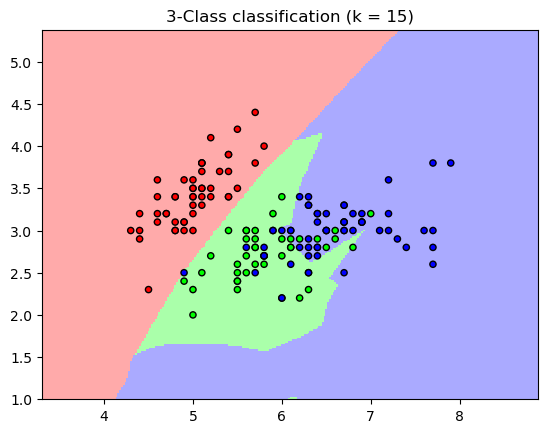

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(128, 128), max_iter = 1000, random_state=1)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"
          % (n_neighbors))
plt.show()

## Regression
Class `MLPRegressor` implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

`MLPRegressor` 类实现了一个多层感知器 (MLP)，它使用反向传播进行训练，输出层没有激活函数，也可以看作是使用恒等函数作为激活函数。 因此，它使用平方误差作为损失函数，输出是一组连续值。

In [7]:
f = lambda x: np.sin(np.pi * x)
X = np.array([-0.9, -0.2, 0.2, 0.7])[:,None]
y = f(X[:,0])

X_test = np.linspace(-1,1,101)[:,None]

接下来，它创建另一个 numpy 数组 X_test，其中 101 个值在 -1 和 1 之间线性间隔，并准备使用具有 2 个隐藏层的多层感知器 (MLP) 回归器预测 f(X_test) 的相应值，每个隐藏层包含 128 个神经元 .

最后，它将 MLP 回归器拟合到 X 和 y 数据，最多迭代 1000 次，随机状态为 1，并预测 X_test 的输出值，将它们存储在 pred 变量中。

总之，此代码定义了一个函数并使用 MLP 回归器将模型拟合到一组给定的输入和相应的输出，然后预测一组新输入的输出。

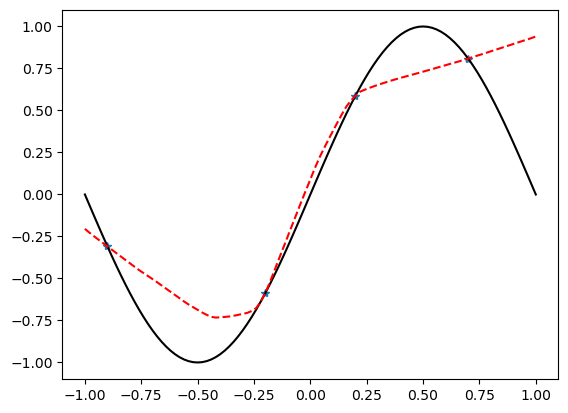

In [8]:
mlpr = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(128, 128), max_iter = 1000, random_state=1)
mlpr.fit(X, y)
pred = mlpr.predict(X_test)
plt.plot(X[:,0], y, '*')
plt.plot(X_test[:,0], f(X_test[:,0]), 'k-')
plt.plot(X_test[:,0], pred, 'r--')


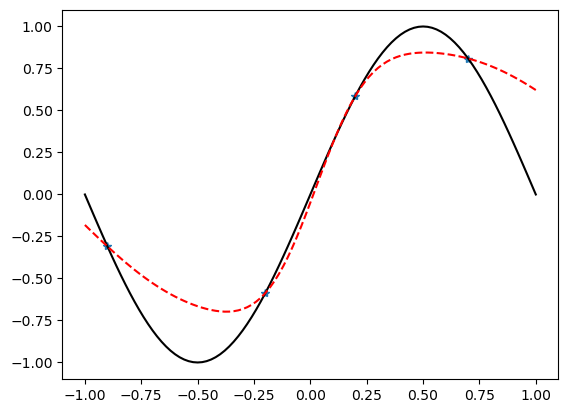

In [9]:
mlpr = MLPRegressor(solver='lbfgs',activation = "tanh", hidden_layer_sizes=(128, 128), max_iter = 1000, random_state=1)
mlpr.fit(X, y)
pred = mlpr.predict(X_test)
plt.plot(X[:,0], y, '*')
plt.plot(X_test[:,0], f(X_test[:,0]), 'k-')
plt.plot(X_test[:,0], pred, 'r--')